In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h',
                                                                  'price_change_percentage_7d',
                                                                  'price_change_percentage_14d',
                                                                  'price_change_percentage_30d',
                                                                  'price_change_percentage_60d']])


In [5]:
# Create a DataFrame with the scaled data
market_data_df_scaled = pd.DataFrame(
    market_data_df_scaled,
    columns = ['price_change_percentage_24h',
               'price_change_percentage_7d',
               'price_change_percentage_14d',
               'price_change_percentage_30d',
               'price_change_percentage_60d'])

# Copy the crypto names from the original data
market_data_df_scaled['coinid'] = market_data_df.index

# Set the coinid column as index
market_data_df_scaled = market_data_df_scaled.set_index('coinid')

# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d
coinid,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_data_df_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
scaled_market_data_elbow = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
scaled_market_data_elbow_df = pd.DataFrame(scaled_market_data_elbow)

# Display the DataFrame
scaled_market_data_elbow_df

c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-pa

,k,inertia
0,1,205.000000
1,2,142.150526
2,3,96.147929
3,4,72.138785
4,5,59.284781
5,6,54.280031
6,7,44.311017
7,8,32.192948
8,9,28.166130
9,10,26.351033


<Axes: title={'center': 'Scaled Market Data Elbow Curve'}, xlabel='k'>

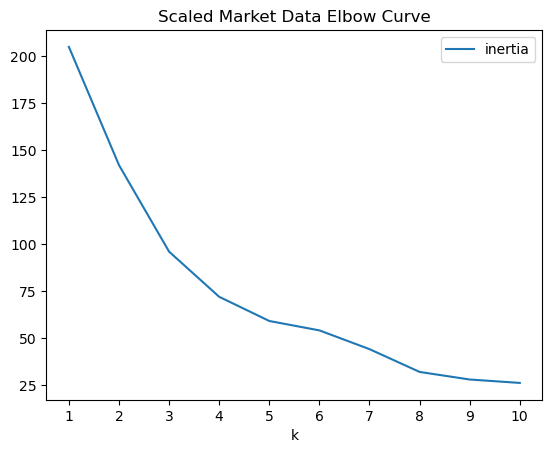

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
scaled_market_data_elbow_df.plot.line(x = 'k',
                                      y = 'inertia',
                                      title = 'Scaled Market Data Elbow Curve',
                                      xticks = k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best values appears to be 5, maybe 4. I see the curve become clearly less steep after 5 but I could also see 4 as a possible stopping point.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters = 5, random_state = 1)

In [12]:
# Fit the K-Means model using the scaled data
k_model.fit(market_data_df_scaled)

c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_prediction = k_model.predict(market_data_df_scaled)

# View the resulting array of cluster values.
print(market_data_prediction)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 3 0 0 0 2 3 0 0 4 0 0 0 1
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
market_data_prediction_df = market_data_df_scaled.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
market_data_prediction_df['prediction'] = market_data_prediction

# Display sample data
market_data_prediction_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,prediction
coinid,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

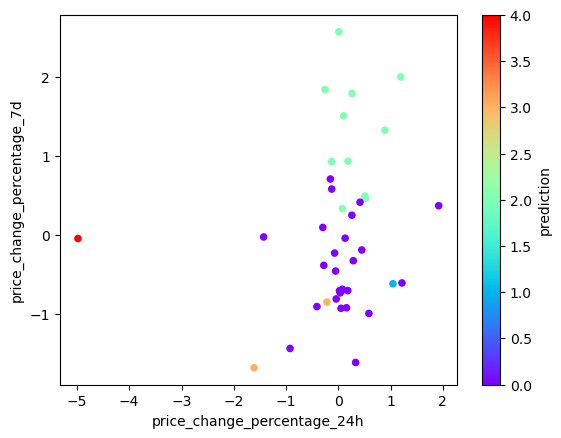

In [16]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_prediction_df.plot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = 'prediction',
    colormap = 'rainbow'
)


### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [18]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_df_scaled)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[ 0.79510406, -0.66290603, -0.15388459],
       [ 0.41376913, -1.04777288,  0.15762251],
       [-0.19550822,  0.51826138, -0.20153516],
       [-0.26074757,  0.34060069, -0.14574095],
       [ 1.96101883, -2.23972436, -0.18298129]])

In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.47862164, 0.26608254, 0.1684978 ])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** PCA1 is the highest at around 48%, PCA2 is much less at 27% and PCA3 is the worst at 17%. Overall, none of the given PCAs are all that great. However, we would use PCA1 and PCA2 to graph.

In [20]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(market_data_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
market_data_pca_df['coinid'] = market_data_df_scaled.index

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index('coinid')

# Display sample data
market_data_pca_df.head(10)

,PCA1,PCA2,PCA3
coinid,,,
bitcoin,0.795104,-0.662906,-0.153885
ethereum,0.413769,-1.047773,0.157623
tether,-0.195508,0.518261,-0.201535
ripple,-0.260748,0.340601,-0.145741
bitcoin-cash,1.961019,-2.239724,-0.182981
binancecoin,1.338761,-1.017717,-0.222509
chainlink,0.465465,-2.840707,0.745956
cardano,0.690398,-1.494549,0.399413
litecoin,0.391531,-0.701588,0.176794


### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow)

# Display the DataFrame
pca_elbow_df

c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-pa

,k,inertia
0,1,187.206406
1,2,124.570023
2,3,78.622143
3,4,55.101503
4,5,42.373171
5,6,38.487855
6,7,35.480992
7,8,24.522165
8,9,20.489295
9,10,16.677060


<Axes: title={'center': 'PCA Market Data Elbow Curve'}, xlabel='k'>

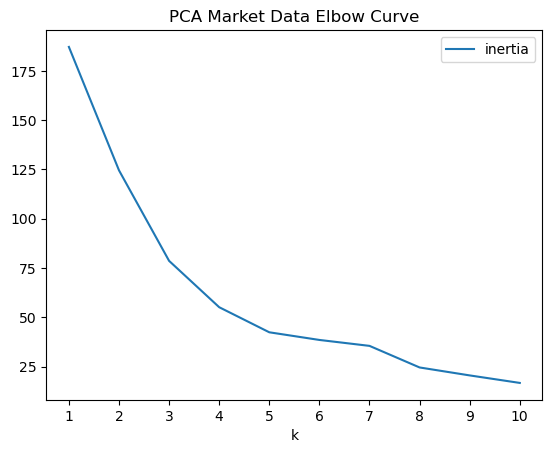

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.plot.line(x = 'k',
                       y = 'inertia',
                       title = 'PCA Market Data Elbow Curve',
                       xticks = k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Looks like 5 is the best value for clustering the data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It is the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters = 5, random_state = 1)

In [24]:
# Fit the K-Means model using the PCA data
k_model.fit(market_data_pca_df)

c:\Users\eredman\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
market_data_pca_prediction = k_model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
print(market_data_pca_prediction)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 3 0 0 0 2 3 0 0 4 2 0 0 1
 0 0 0 0]


In [26]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_prediction_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_prediction_df['prediction'] = market_data_pca_prediction

# Display sample data
market_data_pca_prediction_df.head()

,PCA1,PCA2,PCA3,prediction
coinid,,,,
bitcoin,0.795104,-0.662906,-0.153885,2
ethereum,0.413769,-1.047773,0.157623,2
tether,-0.195508,0.518261,-0.201535,0
ripple,-0.260748,0.340601,-0.145741,0
bitcoin-cash,1.961019,-2.239724,-0.182981,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

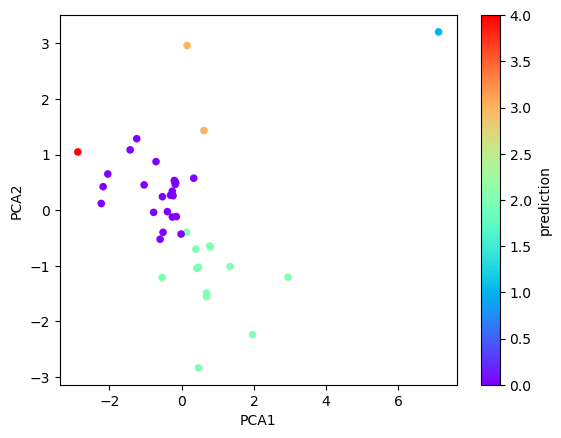

In [27]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_data_pca_prediction_df.plot.scatter(
    x = 'PCA1',
    y = 'PCA2',
    c = 'prediction',
    colormap = 'rainbow'
)

### Determine the Weights of Each Feature on each Principal Component

In [29]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_df_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,0.305426,-0.191224,-0.928561
price_change_percentage_7d,0.224390,-0.747415,0.244403
price_change_percentage_14d,0.548569,-0.290229,0.244677
price_change_percentage_30d,0.581675,0.259260,0.070480
price_change_percentage_60d,0.465929,0.503345,0.114924


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** For price_change_percentage_24h, PCA3 has the strongest impact.
              For price_change_percentage_7d, PCA2 has the strongest impact.
              For the rest, PCA1 has the strongest impact.
    